In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
from scipy import stats

# Data Cleaning pt.1

First we read in the csv

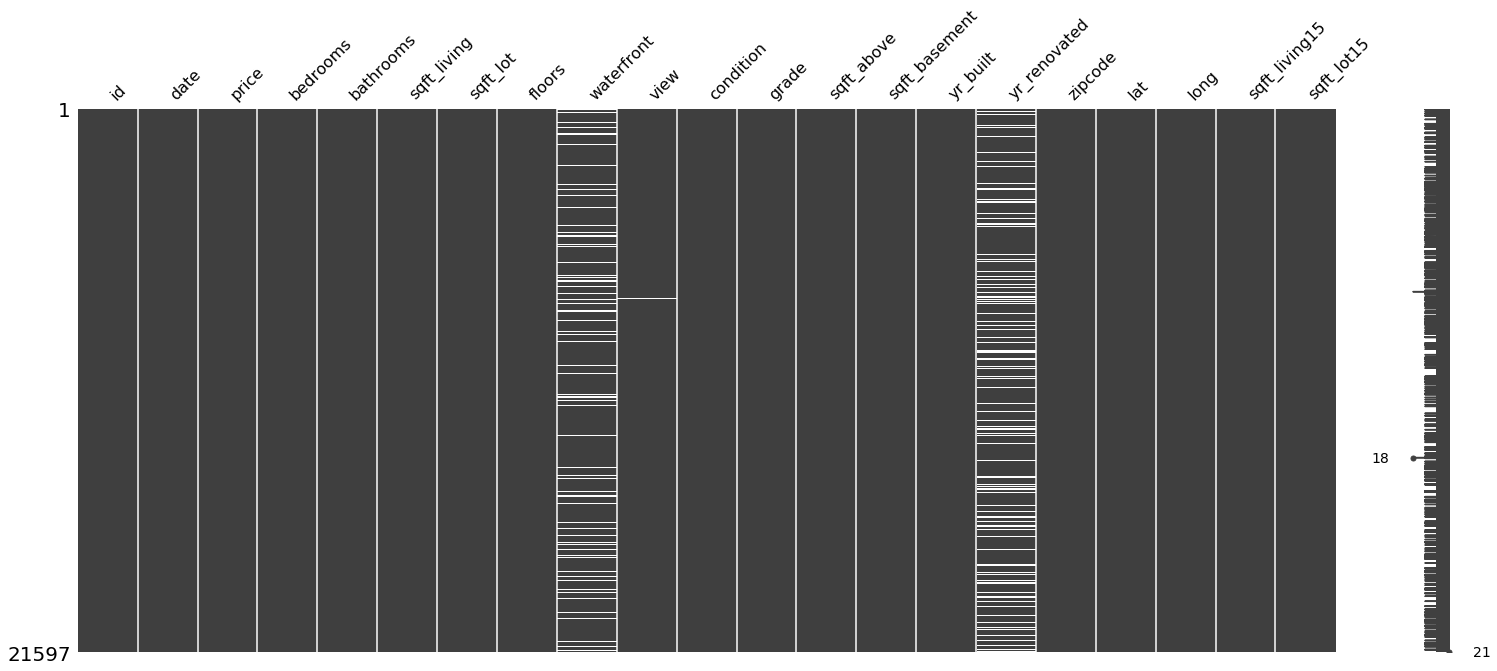

In [15]:
kc_csv = pd.read_csv('./data/kc_house_data.csv')
kcdf = pd.DataFrame(kc_csv)
msno.matrix(kcdf)

Then we look through each column in the list of 'columns_to_replace' and replace '?' with Nan values.

In [3]:
columns_to_replace = ['sqft_basement']
replace_column_w_nan(kcdf, columns_to_replace, '?')

Replaced ? values from these columns:['sqft_basement']


Then we look through each column in the list of 'columns_with_na' and drop any rows with NA

In [4]:
columns_with_na = ['view']
drop_na_rows(kcdf, columns_with_na)

Removed NA rows from these columns:['view'].


Then we look through each column in the list of 'columns_to_drop' and drop respective columns.

In [5]:
columns_to_drop = ['waterfront', 'yr_renovated','sqft_above','sqft_basement','lat','long']
drop_columns(kcdf, columns_to_drop)

Dropped these columns:['waterfront', 'yr_renovated', 'sqft_above', 'sqft_basement', 'lat', 'long']


Now strip all leading/trailing spaces from any remaining cells of type 'string'

In [6]:
strip_spaces(kcdf)

stripped leading/trailing spaces from all cells of string type


Check for duplicates

In [7]:
check_duplicates(kcdf)

You're all clear of duplicates


and review the top layer of data cleaning results

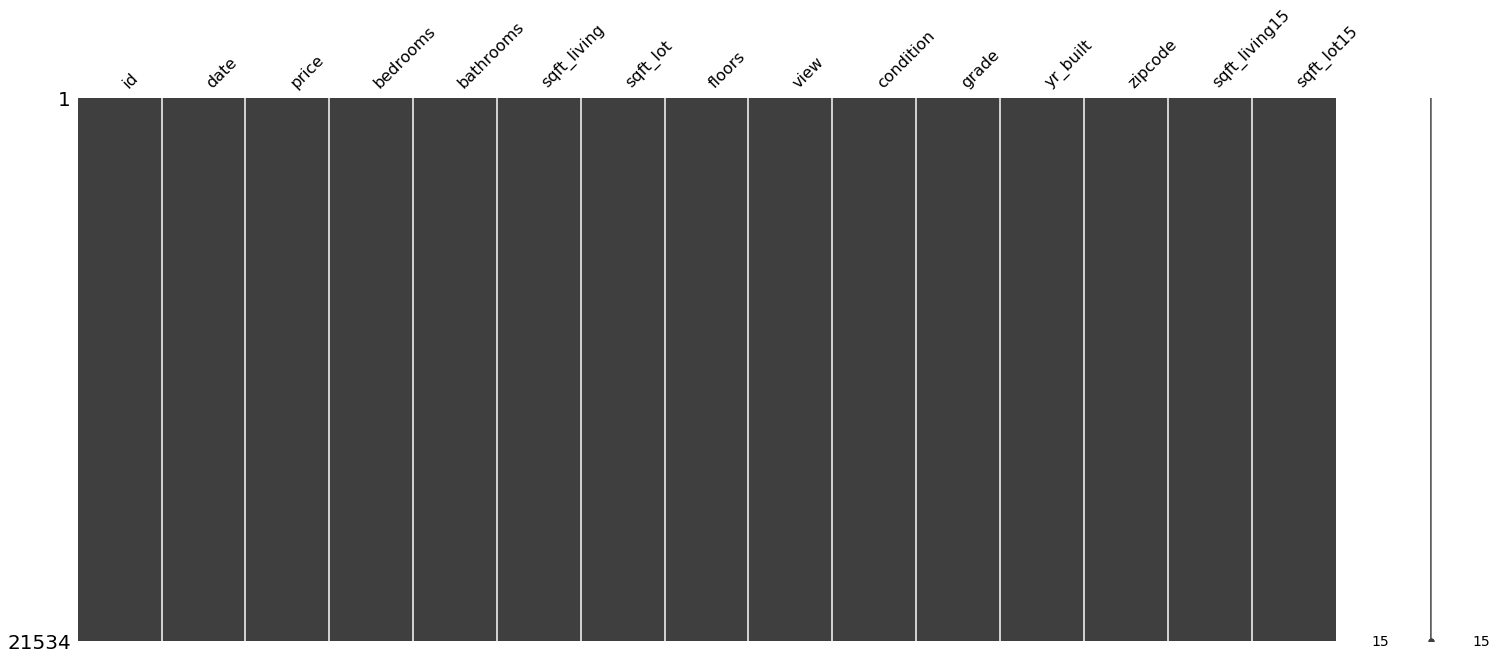

In [8]:
msno.matrix(kcdf)

# Data Cleaning pt.2

Now that our data has been sufficiently cleaned of values that would skew analysis, we can begin to calculate potential outliers.

In [9]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.233863,3.409724,7.657425,1971.002275,98077.939352,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,0.650654,1.172643,29.376044,53.506639,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,2015.000000,98199.000000,6210.000000,871200.000000


We determined that the most important columns to address are 'bathrooms' and 'bedrooms'.

In [10]:
columns_with_outliers = ['bathrooms', 'bedrooms']

We will calculate the absolute z-score for each cell in both columns

If a z-score is above 3, then we consider it an outlier and will remove it.

In [11]:
kcdf = remove_outliers(kcdf, columns_with_outliers)

Removed outliers from these columns:['bathrooms', 'bedrooms']


# Finale

And finally we can take our fully cleaned data and pickle it for futher analysis.

In [12]:
pickled_KC= pd.to_pickle(kcdf, './data/cleaned_KC.pkl')

In [13]:
cleaned_KC = pd.read_pickle('./data/cleaned_KC.pkl')

In [14]:
cleaned_KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,1800,7503
